In [1]:
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB  ##导入高斯朴素贝叶斯算法

import random
import lightgbm as lgb

C:\Users\lhsin04\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\lhsin04\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data=pd.read_csv('C:/2datasets/1.csv')
data2=pd.read_csv('C:/2datasets/2.csv')

In [20]:
data=pd.read_csv('C:/2datasets/1.csv')
data2=pd.read_csv('C:/2datasets/2.csv')

In [21]:
data.head()


,name,T,C1,Mn1,S1,P1,Si1,m,C2,Mn2,...,10,11,12,13,14,15,16,sum,y1,y2
0,7A06878,1644.0,0.00065,0.0011,0.00030,0.00014,0.004,74400,0.0023,0.0133,...,0,0,85,1547,0,88,0,72613,0.913405,0.883638
1,7A06877,1543.0,0.00077,0.0011,0.00039,0.00021,0.004,74200,0.0023,0.0137,...,0,0,68,1530,0,132,0,72401,0.866518,0.920269
2,7A06875,1674.0,0.00048,0.0012,0.00036,0.00030,0.004,73600,0.0022,0.0131,...,0,0,85,0,1450,132,0,71839,0.867223,0.909680
3,7A06874,1800.0,0.00036,0.0009,0.00028,0.00025,0.004,72400,0.0024,0.0133,...,0,0,90,0,1450,132,0,70609,0.979585,0.932447
4,7A06873,1660.0,0.00022,0.0007,0.00038,0.00014,0.004,70350,0.0023,0.0132,...,0,0,90,0,1450,132,0,68559,0.970512,0.913352


IndexError: too many indices for array

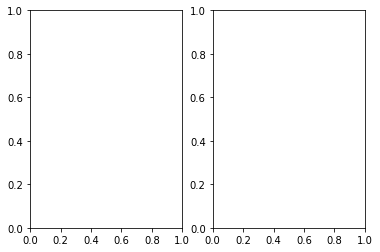

In [22]:
import seaborn as sns
 
f,ax = plt.subplots(1,2)
sns.boxplot(x='T',y='y1',data=data,ax=ax[0,0])
sns.boxplot(x='T',y='y2',data=data,ax=ax[0,1])


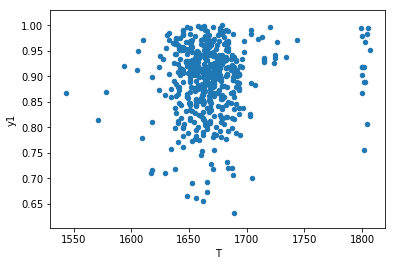

In [23]:
data.plot(kind="scatter",x="T",y="y1")

In [24]:
print(data.isnull().sum())

name          0
T            38
C1            0
Mn1         334
S1            0
P1          334
Si1           0
m             0
C2            0
Mn2           0
S2            0
P2            0
Si2           0
Ceq_val2      0
Cr2           0
Ni_val2       0
Cu_val2       0
Nb_val2     406
V_val2        0
Alt_val2      0
Als_val2      0
Mo_val2       0
Ti_val2       7
N_val2      541
O_val2      541
B_val2      497
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
sum           0
y1            0
y2            0
dtype: int64


In [25]:
data.fillna(data.median()['T'],inplace=True)

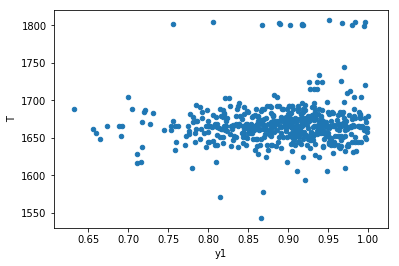

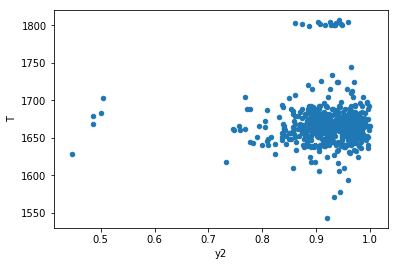

In [33]:
data.plot(kind="scatter",x="y1",y="T")
data.plot(kind="scatter",x="y2",y="T")

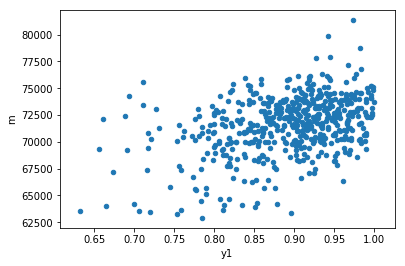

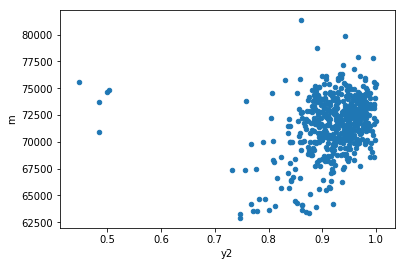

In [34]:
data.plot(kind="scatter",x="y1",y="m")
data.plot(kind="scatter",x="y2",y="m")

ValueError: scatter requires y column to be numeric

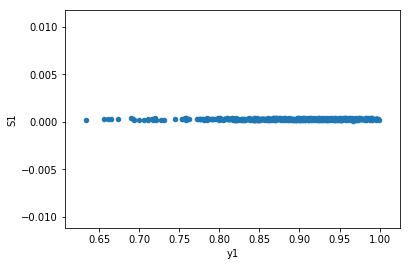

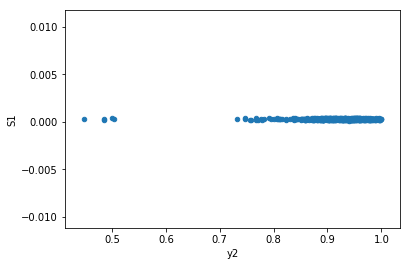

In [36]:
data.plot(kind="scatter",x="y1",y="S1")
data.plot(kind="scatter",x="y2",y="S1")
data.plot(kind="scatter",x="y1",y="Si1")
data.plot(kind="scatter",x="y2",y="Si1")

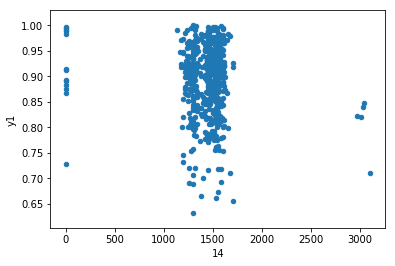

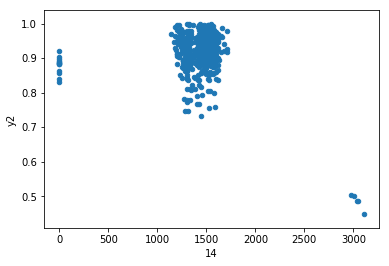

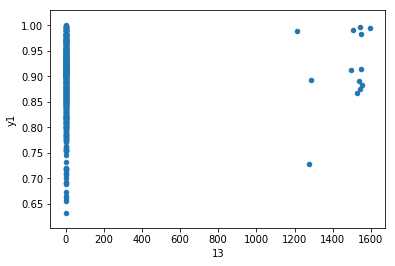

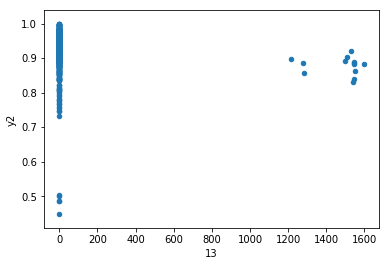

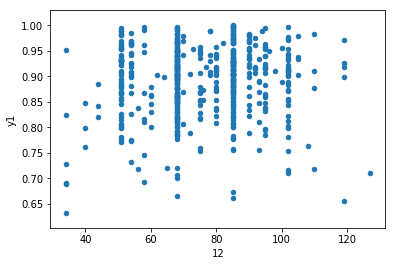

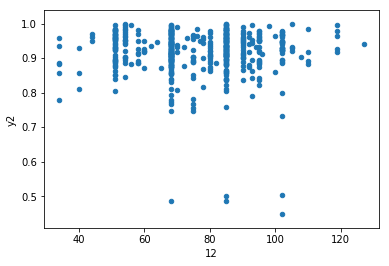

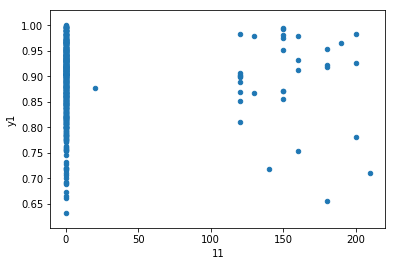

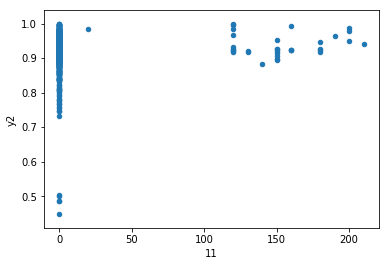

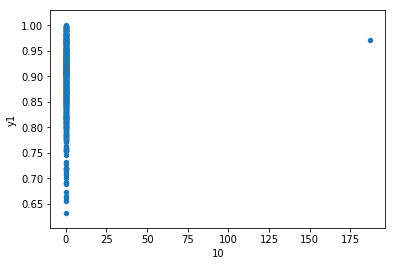

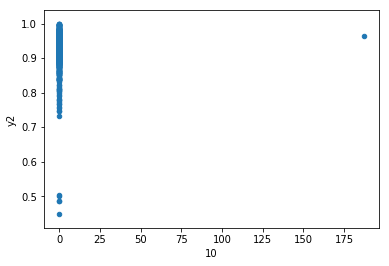

In [42]:
data.plot(kind="scatter",y="y1",x="14")
data.plot(kind="scatter",y="y2",x="14")
data.plot(kind="scatter",y="y1",x="13")
data.plot(kind="scatter",y="y2",x="13")
data.plot(kind="scatter",y="y1",x="12")
data.plot(kind="scatter",y="y2",x="12")
data.plot(kind="scatter",y="y1",x="11")
data.plot(kind="scatter",y="y2",x="11")
data.plot(kind="scatter",y="y1",x="10")
data.plot(kind="scatter",y="y2",x="10")

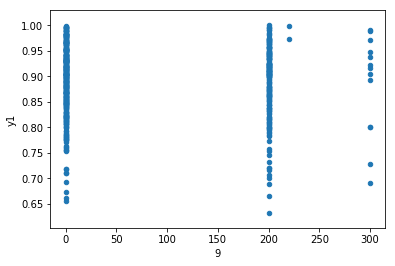

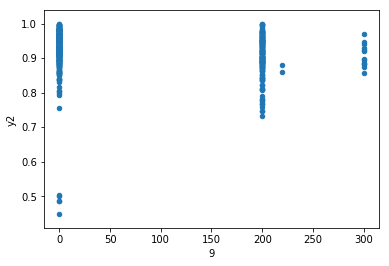

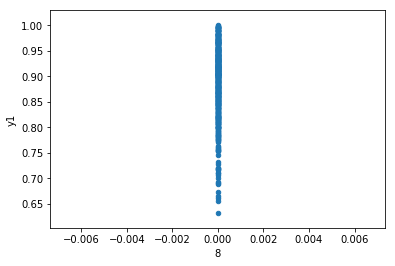

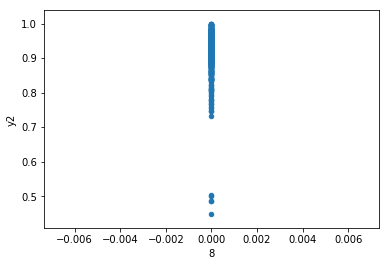

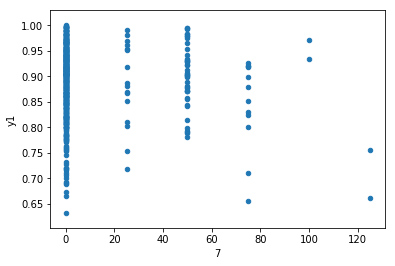

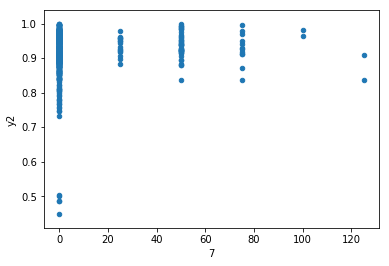

In [43]:
data.plot(kind="scatter",y="y1",x="9")
data.plot(kind="scatter",y="y2",x="9")
data.plot(kind="scatter",y="y1",x="8")
data.plot(kind="scatter",y="y2",x="8")
data.plot(kind="scatter",y="y1",x="7")
data.plot(kind="scatter",y="y2",x="7")

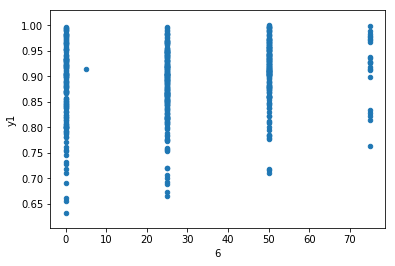

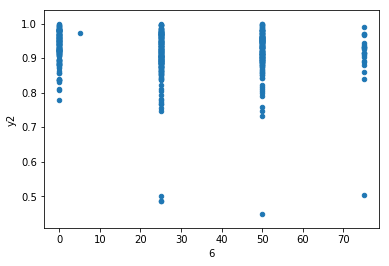

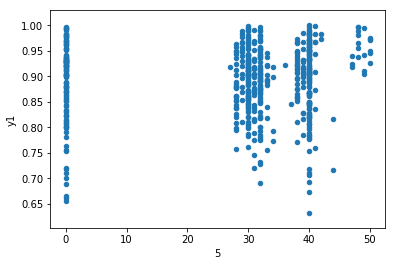

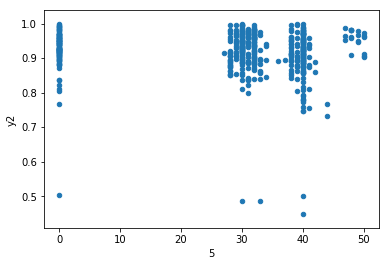

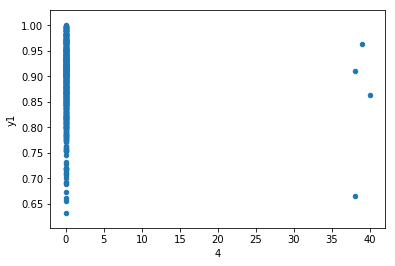

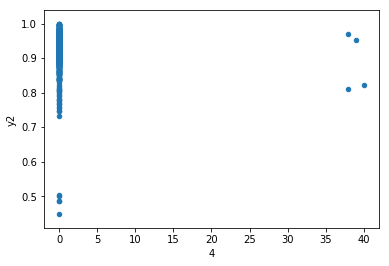

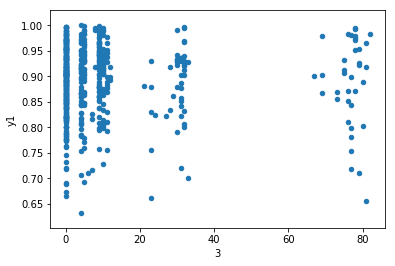

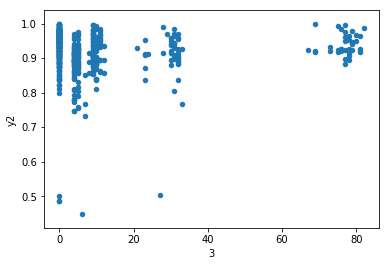

In [44]:
data.plot(kind="scatter",y="y1",x="6")
data.plot(kind="scatter",y="y2",x="6")
data.plot(kind="scatter",y="y1",x="5")
data.plot(kind="scatter",y="y2",x="5")
data.plot(kind="scatter",y="y1",x="4")
data.plot(kind="scatter",y="y2",x="4")
data.plot(kind="scatter",y="y1",x="3")
data.plot(kind="scatter",y="y2",x="3")

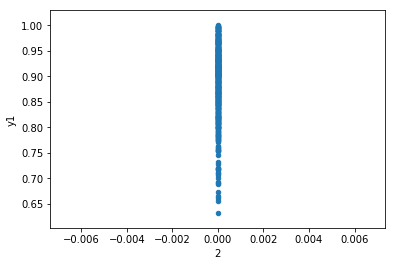

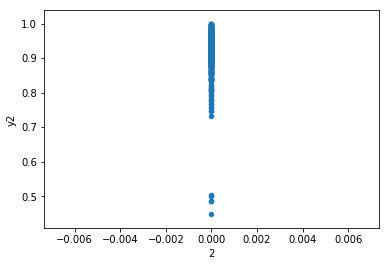

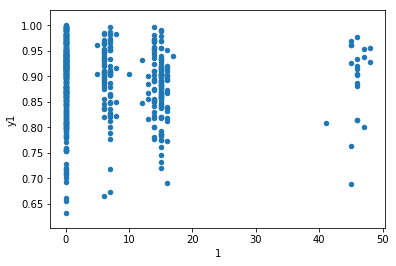

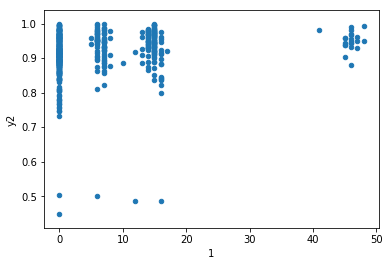

In [45]:
data.plot(kind="scatter",y="y1",x="2")
data.plot(kind="scatter",y="y2",x="2")
data.plot(kind="scatter",y="y1",x="1")
data.plot(kind="scatter",y="y2",x="1")


In [47]:
data.drop(["Mn1",'P1','C2','Mn2',"S2","P2","Si2","Cr2","Nb_val2","N_val2","O_val2","B_val2"],axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D54A4D4E80>,
      dtype=object)

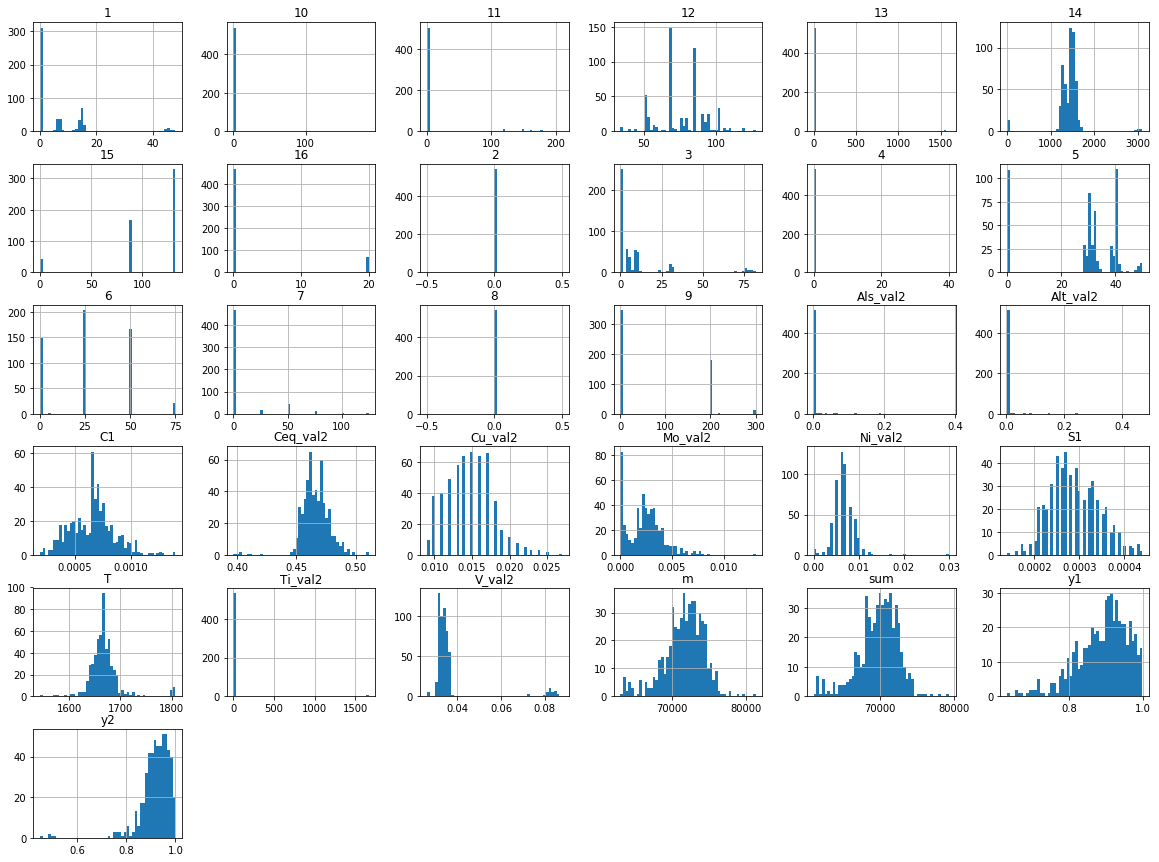

In [49]:
data.hist(bins=50,figsize=(20,15))

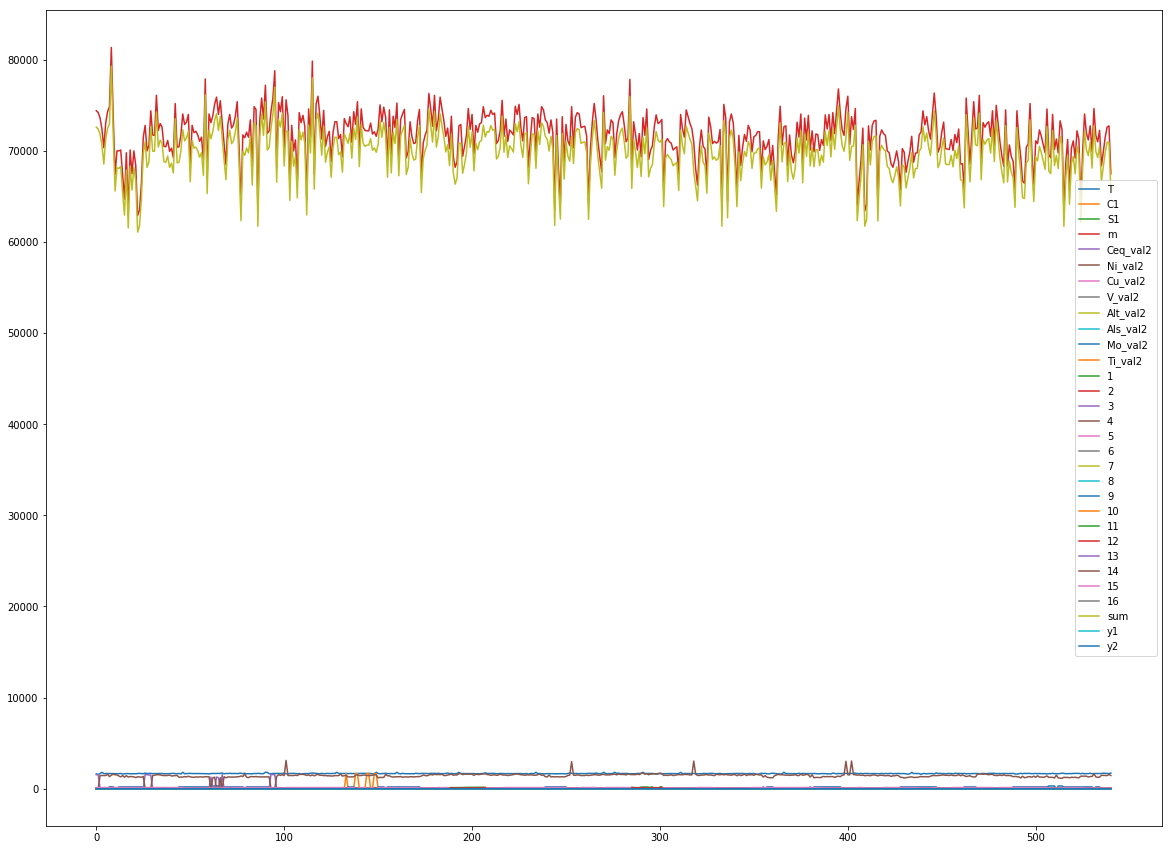

In [59]:
data.drop(["Mn1",'name',"S1",'C2',"Mn2","S2","P2","Si2",'Cr2',"N_val2","O_val2","B_val2","2","4","8","10"],axis=1,inplace=True)


KeyError: "['Mn1' 'C2' 'Mn2' 'S2' 'P2' 'Si2' 'Cr2' 'N_val2' 'O_val2' 'B_val2'] not found in axis"